In [22]:
def Evalue(numberlist:list) ->float:
    return sum(numberlist)/len(numberlist)

def cov(a:list,b:list) ->float:
    prdctlist = [a[i]*b[i] for i in range(len(a))]
    return Evalue(prdctlist)

def timeseriesread(filename) ->list:
    datalist = []
    openf = open(filename,"r")
    for line in openf:
        datalist.append(float(str(line).strip()))
    return datalist

def dot_num(numberlist:list,deltaT:int) ->list:
    dotrtlist = [(numberlist[i+1]-numberlist[i])/deltaT for i in range(len(numberlist)-1)]
    return dotrtlist

def dot_differ_list(numberlist:list,deltaT) ->list:
    dot_mean = Evalue(dot_num(numberlist,deltaT))
    dot_differ_rt = [dot_num(numberlist,deltaT)[i]-dot_mean for i in range(len(dot_num(numberlist,deltaT)))]
    return dot_differ_rt

def cov_d(a:list,b:list) ->float:
    dot_differ = dot_differ_list(b,2)
    prdctlist = [a[i]*dot_differ[i] for i in range(len(dot_differ))]
    return Evalue(prdctlist)

def T_2_to_1(one:list,two:list):
    c11 = cov(one,one)
    c12 = cov(one,two)
    c22 = cov(two,two)
    c2d1 = cov_d(two,one)
    c1d1 = cov_d(one,one)
    upper = c11*c12*c2d1-c12*c12*c1d1
    lower = c11*c11*c22-c11*c12*c12
###    print(" c11",c11,"\n",
###          "c12",c12,"\n",
###          "c22",c22,"\n",
###          "c2d1",c2d1,"\n",
###          "c1d1",c1d1,"\n")
    return upper/lower
    
nino3 = timeseriesread("ts_nino3.txt")
nino3_2 = nino3[180:]
nino3_3 = nino3[90:]
ca = timeseriesread("ts_cni.txt")
ca_2 = ca[180:]
ca_3 = ca[90:]
dot_ca = dot_num(ca,1)
dot_nino3 = dot_num(nino3,1)

###for i in range(100):
###    print(nino3[i],"\t",ca[i])

nino3toca = T_2_to_1(ca,nino3)
print("The rate of entropy flow from El nino to California Nino is {} nats per month from 1982 to 2014\n".format(nino3toca))
catonino3 = T_2_to_1(nino3,ca)
print("The rate of entropy flow from California Nino to El nino is {} nats per month from 1982 to 2014\n".format(catonino3))
nino3toca_2 = T_2_to_1(ca_2,nino3_2)
print("The rate of entropy flow from El nino to California Nino is {} nats per month from 1997 to 2014\n".format(nino3toca_2))
catonino3_2 = T_2_to_1(nino3_2,ca_2)
print("The rate of entropy flow from California Nino to El nino is {} nats per month from 1997 to 2014\n".format(catonino3_2))
nino3toca_3 = T_2_to_1(ca_3,nino3_3)
print("The rate of entropy flow from El nino to California Nino is {} nats per month from 1990 to 2014\n".format(nino3toca_3))
catonino3_3 = T_2_to_1(nino3_3,ca_3)
print("The rate of entropy flow from California Nino to El nino is {} nats per month from 1990 to 2014\n".format(catonino3_3))



The rate of entropy flow from El nino to California Nino is 0.0021312420048440854 nats per month from 1982 to 2014

The rate of entropy flow from California Nino to El nino is 0.0034223301080279047 nats per month from 1982 to 2014

The rate of entropy flow from El nino to California Nino is 0.0072754503590205565 nats per month from 1997 to 2014

The rate of entropy flow from California Nino to El nino is 0.01772866396003561 nats per month from 1997 to 2014

The rate of entropy flow from El nino to California Nino is 0.0053450027804190945 nats per month from 1990 to 2014

The rate of entropy flow from California Nino to El nino is 0.005748220233005397 nats per month from 1990 to 2014



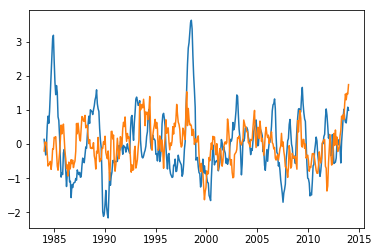

In [23]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.linspace(1984,2014,396)
plt.plot(x1,nino3)
plt.plot(x1,ca)
plt.show()

300


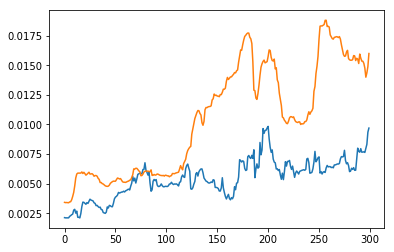

In [24]:
Teltoca = []
Tcatoel = []
for i in range(300):
    Teltoca.append(T_2_to_1(ca[i:],nino3[i:]))
    Tcatoel.append(T_2_to_1(nino3[i:],ca[i:]))
    

plt.plot(Teltoca)
plt.plot(Tcatoel)
print(len(Teltoca))
plt.show()




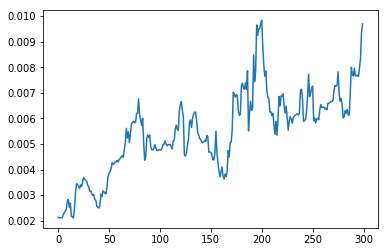

In [25]:
plt.plot(Teltoca)
plt.show()

In [26]:
nino3noaa = timeseriesread("nino3_noaa_data.txt")

In [27]:
sum(nino3noaa)/len(nino3noaa)

-0.06034755134281209

In [28]:
iod = timeseriesread("iod_dmi_data.txt")

In [29]:
sum(iod)/len(iod)

7.441001579779287e-05

In [30]:
nino3noaa_2  = [nino3noaa[i]+0.06034755134 for i in range(len(nino3noaa))]

In [31]:
sum(nino3noaa_2)/len(nino3noaa_2)

-2.8119946252153128e-12

In [32]:
nino3noaa = nino3noaa_2

In [39]:
iodtoel = T_2_to_1(nino3noaa,iod)
iodtoel

0.013382007372665618

In [40]:
eltoiod = T_2_to_1(iod,nino3noaa)
eltoiod

-0.007192423118617872

In [35]:
len(nino3noaa)

633

In [36]:
len(iod)

633